In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

/home/lb/jupyterlab-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reminder
percentage of the depth and table affect to how the light will "interact" with diamond

#### Критерии оценивания проекта на Экзамен:
1. Формулировка цели и описание данных (10 баллов)
Цель проекта, исследовательский вопрос, описание датасета, структуры, ограничений 
2. Очистка и подготовка данных (30 баллов)
Обработка пропусков, Работа с выбросами, Коррекция типов данных и категориальных признаков, Удаление дубликатов
3. Первичный статистический анализ (15 баллов)
Описательные статистики, распределений, интерпретация статистик 
4. Визуальный анализ данных (10 баллов)
Релевантность визуализаций, качество оформления графиков, графики зависимостей и распределений
5. Применение ML‑моделей (25 баллов)
Обоснование выбора моделей, Корректная подготовка данных для моделей, Реализация 1–3 моделей, оценка качества моделей, Интерпретация результатов моделей 
6. Итоговые выводы и интерпретация (10 баллов)
Подведение итогов EDA и ML части
7. Отсутствие отчета ( - 30 баллов) !

In [2]:
df = pd.read_csv('diamond.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.31,Ideal,F,VVS2,61.5,56.0,4.35,4.37,2.68,917.0
1,1.02,Very Good,NaN,NaN,59.9,57.0,6.54,6.59,3.93,9246.0
2,0.31,Ideal,H,NaN,62.4,55.0,4.36,4.33,2.71,698.0
3,0.62,Ideal,G,VS1,60.7,55.0,5.55,5.59,3.38,2206.0
4,0.41,Ideal,F,VS2,60.0,NaN,4.82,4.88,2.91,863.0


### Tasks 1, 2, 3
1. Формулировка цели и описание данных (10 баллов) Цель проекта, исследовательский вопрос, описание датасета, структуры, ограничений
2. Очистка и подготовка данных (30 баллов) Обработка пропусков, Работа с выбросами, Коррекция типов данных и категориальных признаков, Удаление дубликатов
3. Первичный статистический анализ (15 баллов) Описательные статистики, распределений, интерпретация статистик 

In [4]:
print('\033[43m           Dataset overview           \033[0m')
print('-'*100)
print('Number of observations         :', len(df))
print('Number of features/predictors  :', len(df.columns))  
print('Target  variable/response      : price')
print('Dataset shape                  :',df.shape)
print('-'*100)
print('\033[1;34mFeatures and description\033[0m')
print('-'*100)
print('Carat   - a measure of diamond weight range of {} -  {}'.format(df['carat'].min(), df['carat'].max()))
print('Cut     - Cut Quality Grade:', df['cut'].unique())
print('Color   - Diamond Color Rating, from worst - J, to D -best')
print('Clarity - Internal Flaw Grade, I1 worst → IF best')
print('Depth   - Total Depth Percentage')
print('Table   - top width percentage')
print('x       - length in millimeters\ny       - width in millimeters\nz       - depth in millimeters.')
print('Price   - Diamond cost USD, range of {} - {}'.format(df.price.min(), df.price.max()))
print('-'*100)
print('\033[1;34mHead of the dataset\033[0m\n', df.head())
print('\n\033[1;34mDataset info\033[0m\n')
print(df.info())
print('\n\033[1;34mDescriptive statistics(numeric)\033[0m\n', df.describe(include=np.number))
print('\n\033[1;34mDescriptive statistics(non numeric)\033[0m\n', df.describe(exclude=np.number))

           Dataset overview           
----------------------------------------------------------------------------------------------------
Number of observations         : 55018
Number of features/predictors  : 10
Target  variable/response      : price
Dataset shape                  : (55018, 10)
----------------------------------------------------------------------------------------------------
Features and description
----------------------------------------------------------------------------------------------------
Carat   - a measure of diamond weight range of 0.2 -  5.01
Cut     - Cut Quality Grade: ['Ideal' 'Very Good' 'Premium' 'Fair' 'Good' nan 'UNKNOWN']
Color   - Diamond Color Rating, from worst - J, to D -best
Clarity - Internal Flaw Grade, I1 worst → IF best
Depth   - Total Depth Percentage
Table   - top width percentage
x       - length in millimeters
y       - width in millimeters
z       - depth in millimeters.
Price   - Diamond cost USD, range of 326.0 - 18823.0
-----

In [5]:
print('\033[43m          Data cleaning and preprocessing               \033[0m')
print('Number of duplicates: {}'.format(df.duplicated().sum()))

# Dropping duplicates
df = df.drop_duplicates().copy()


print('After drop          : {}'.format(df.duplicated().sum()))
print('-'*100)
print('\033[1;34mChecking for incorrect measurements and zeros of dimensions\033[0m')
print('For x: {}'.format(len(df[df['x']==0])))
print('For y: {}'.format(len(df[df['y']==0])))
print('For z: {}'.format(len(df[df['z']==0])))

#Dropping zeros on dimensions
temp = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index
df = df.drop(temp).copy()


print('After drop for x: {}'.format(len(df[df['x']==0])))
print('After drop for y: {}'.format(len(df[df['y']==0])))
print('After drop for z: {}'.format(len(df[df['z']==0])))
print('-'*100)
print('\033[1;34mHandling missing values, \033[0m')
print('\nNumber of missed values\n{}'.format(df.isna().sum()))
print('Portion of missed values in procent: \n{}'.format((df.isna().sum()/len(df))*100))


# Handling missed values
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


print('\nNumber of missed values after cleaning\n{}'.format(df.isna().sum()))
print('Number of non standart features: Unknown - {}; ? - {}'.format(len(df[df['cut'] == 'UNKNOWN']), len(df[df['color']=='?'])))
df = df.drop(df[(df['cut'] == 'UNKNOWN') | (df['color'] == '?')].index).copy()
print('\nNumber of non standart features after drop: Unknown - {}; ? - {}'.format(len(df[df['cut'] == 'UNKNOWN']), len(df[df['color']=='?'])))


print('-'*100)
miss_vals_te = """Because of the portion of missed values is not significant,
instead of by advanced techniques like imputation with KNN or PCA
we decided to impute median for numerical and mode for categorical features of the column."""
print(miss_vals_te)


print('-'*100)
print('\033[1;34mOutliers\033[0m')

def out(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    up = q3+1.5*iqr
    outliers = df[(df[col]<low)|(df[col]>up)]
    return outliers
price_outliers = out(df, 'price')
carat_outliers = out(df, 'carat')
print('Outliers in price: {}'.format(len(price_outliers)))
print('Outliers in carat: {}'.format(len(carat_outliers)))
print("Outliers will be removed if they have a significant impact on the model.")

          Data cleaning and preprocessing               
Number of duplicates: 1149
After drop          : 0
----------------------------------------------------------------------------------------------------
Checking for incorrect measurements and zeros of dimensions
For x: 208
For y: 206
For z: 220
After drop for x: 0
After drop for y: 0
After drop for z: 0
----------------------------------------------------------------------------------------------------
Handling missing values, 

Number of missed values
carat      1621
cut        1618
color      1619
clarity    1544
depth      1608
table      1528
x          1641
y          1618
z          1685
price      1533
dtype: int64
Portion of missed values in procent: 
carat      3.021492
cut        3.015900
color      3.017764
clarity    2.877966
depth      2.997260
table      2.848143
x          3.058771
y          3.015900
z          3.140785
price      2.857462
dtype: float64

Number of missed values after cleaning
carat      0
cut    

In [6]:
print('\033[43m            Dataset after preprocessing                 \033[0m\n')
print('\033[1;34mInfo:\033[0m')
print(df.info())
print('-'*100)
print('\033[1;34mThe head of the dataset\033[0m')
print(df.head())

            Dataset after preprocessing                 

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 53350 entries, 0 to 55017
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53350 non-null  float64
 1   cut      53350 non-null  object 
 2   color    53350 non-null  object 
 3   clarity  53350 non-null  object 
 4   depth    53350 non-null  float64
 5   table    53350 non-null  float64
 6   x        53350 non-null  float64
 7   y        53350 non-null  float64
 8   z        53350 non-null  float64
 9   price    53350 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB
None
----------------------------------------------------------------------------------------------------
The head of the dataset
   carat        cut color clarity  depth  table     x     y     z   price
0   0.31      Ideal     F    VVS2   61.5   56.0  4.35  4.37  2.68   917.0
1   1.02  Very Good     G     SI1   59.9   57.

### Task 4
Визуальный анализ данных (10 баллов) Релевантность визуализаций, качество оформления графиков, графики зависимостей и распределений

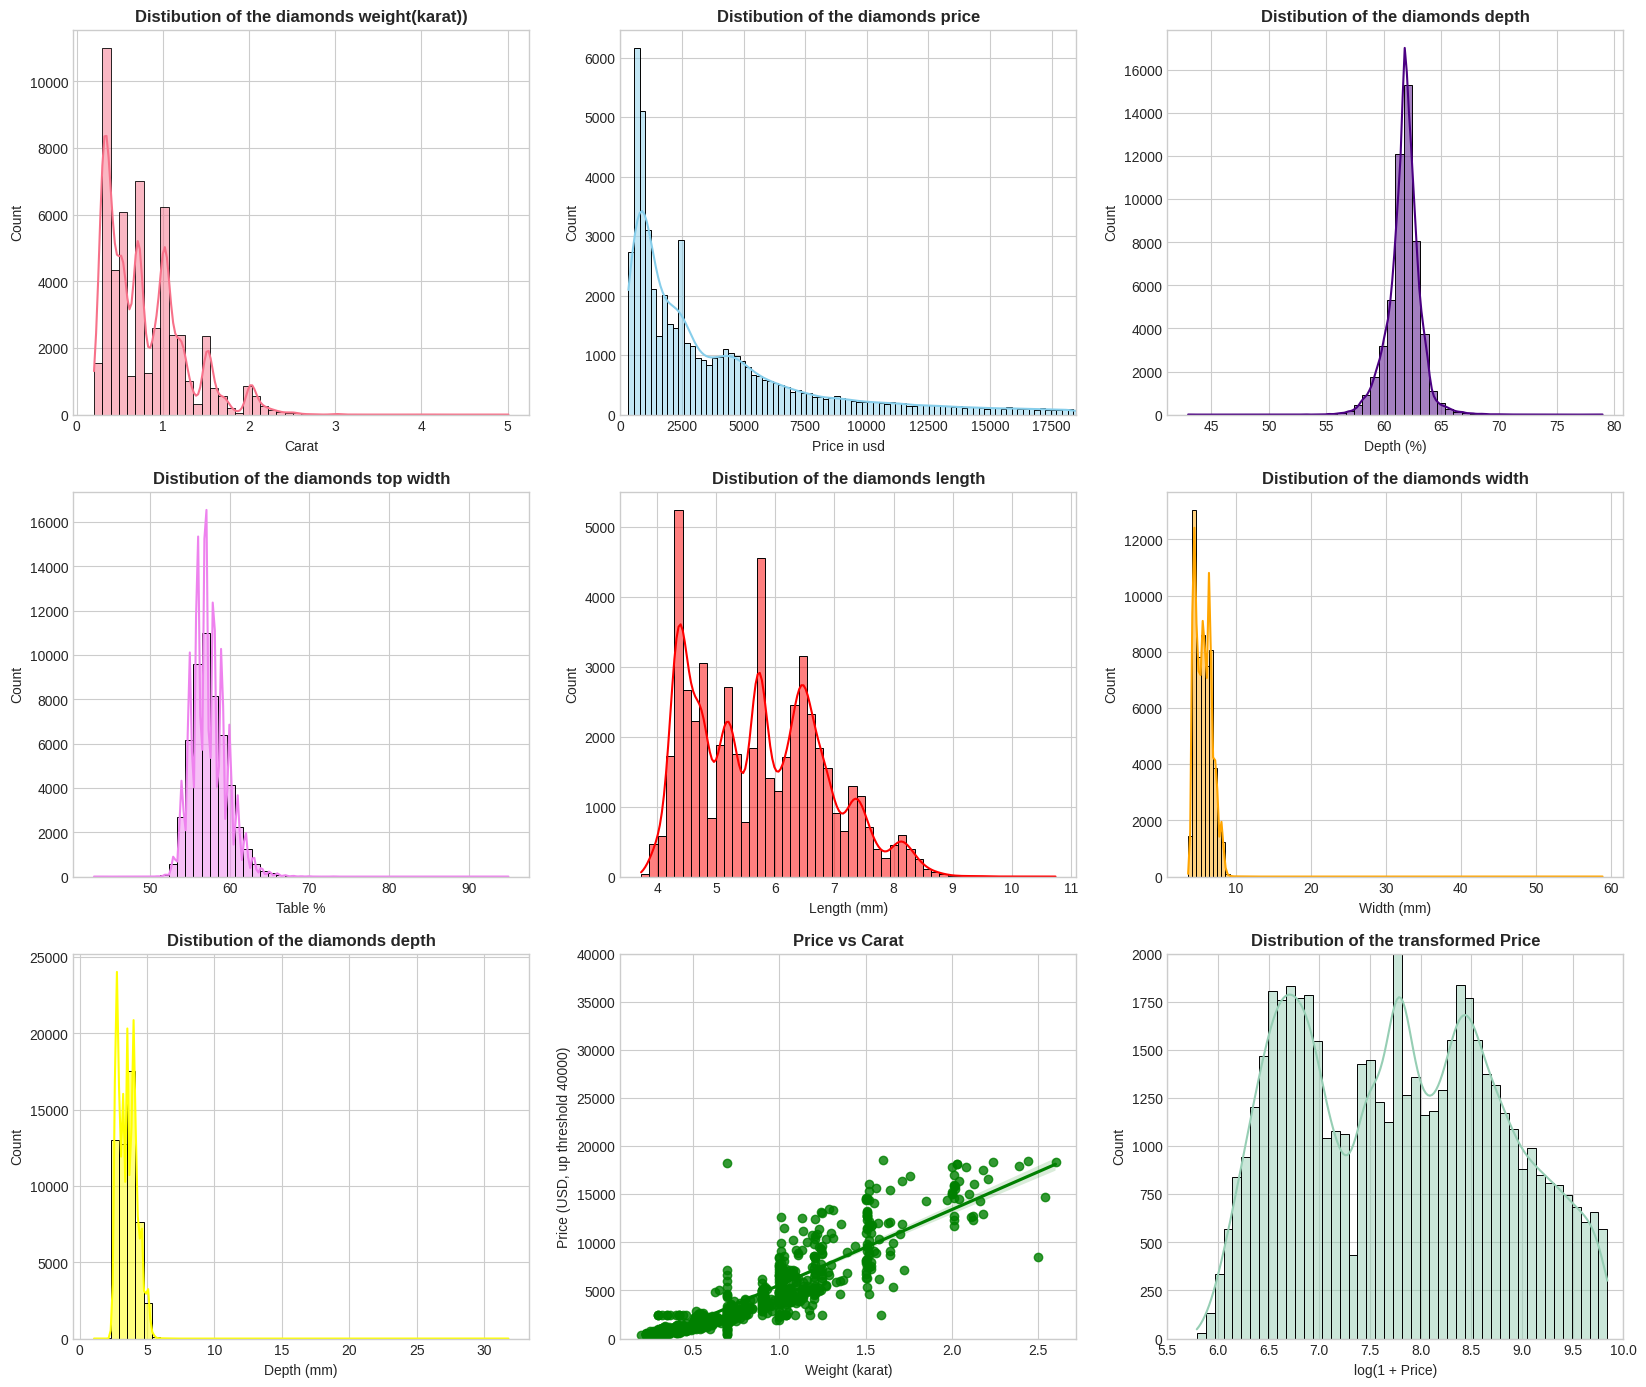

In [7]:
# Nurbol, temporary, change style if you want 
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig = plt.figure(figsize=(20, 23))

# -------------

plt.subplot(4,3,1)
sns.histplot(data=df, x='carat', bins=50, kde=True)
plt.title('Distibution of the diamonds weight(karat))', fontweight='bold')
plt.xlabel('Carat')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,2)
sns.histplot(data=df, x='price', kde=True, linewidth = 0.7, color = 'skyblue')
plt.title('Distibution of the diamonds price', fontweight='bold')
plt.xlabel('Price in usd')
plt.ylabel('Count')
plt.xlim(0, 18500)

# -------------

plt.subplot(4,3,3)
sns.histplot(data=df, x='depth', kde=True, bins=50, linewidth = 0.7, color = 'indigo')
plt.title('Distibution of the diamonds depth', fontweight='bold')
plt.xlabel('Depth (%)')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,4)
sns.histplot(data=df, x='table', kde=True, bins=50, linewidth = 0.7, color = 'violet')
plt.title('Distibution of the diamonds top width', fontweight='bold')
plt.xlabel('Table %')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,5)
sns.histplot(data=df, x='x', kde=True, bins=50, linewidth = 0.7, color = 'red')
plt.title('Distibution of the diamonds length', fontweight='bold')
plt.xlabel('Length (mm)')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,6)
sns.histplot(data=df, x='y', kde=True, bins=100, linewidth = 0.7, color = 'orange')
plt.title('Distibution of the diamonds width', fontweight='bold')
plt.xlabel('Width (mm)')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,7)
sns.histplot(data=df, x='z', kde=True, bins=50, linewidth = 0.7, color = 'yellow')
plt.title('Distibution of the diamonds depth', fontweight='bold')
plt.xlabel('Depth (mm)')
plt.ylabel('Count')

# -------------

plt.subplot(4,3,8)
# sns.scatterplot(data=df.sample(1000), x='carat', y='price', color = '#3498DB', alpha=0.5, edgecolor=None)
sns.regplot(data=df.sample(1000), x='carat', y='price', color = 'green')
plt.title('Price vs Carat', fontweight='bold')
plt.xlabel('Weight (karat)')
plt.ylabel('Price (USD, up threshold 40000)')
plt.ylim(0,40000)

# -------------

plt.subplot(4,3,9)
df['price_log'] = np.log1p(df['price'])
sns.histplot(data=df, x = 'price_log', kde=True, color='#96CEB4', linewidth = 0.7)
plt.title('Distribution of the transformed Price', fontweight='bold')
plt.xlabel('log(1 + Price)')
plt.ylabel('Count')
plt.xlim(5.5,10)
plt.ylim(0,2000)

plt.show()

            Insights                 

Price is heavily right skewed, so transformation is needed, 
log transformation is a common way to transform right scewed distribution,
like prices, sizes, incomes.

The distribution of the carat is wavy with very high peaks,  0.3, 0.6, 1, 1.5, 2. 
Maybe popular format or this is the optimal way for a diamond manufacturer to process it.

The weight and size strongly correlated with each other:
           carat         x         y         z
carat  1.000000  0.947898  0.923398  0.930034
x      0.947898  1.000000  0.944256  0.944130
y      0.923398  0.944256  1.000000  0.925862
z      0.930034  0.944130  0.925862  1.000000

Most portion of diamonds are ideal, premium, very good cut, and G, E, F color.

cut
Ideal        22257
Premium      13216
Very Good    11642
Good          4702
Fair          1533
Name: count, dtype: int64
color
G    12426
E     9402
F     9161
H     7953
D     6500
I     5214
J     2694
Name: count, dtype: int64


/tmp/ipykernel_9176/1062649942.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cut_freq.index, y=cut_freq.values, palette=cut_palette)
/tmp/ipykernel_9176/1062649942.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_freq.index, y=col_freq.values,palette=cut_palette)
/tmp/ipykernel_9176/1062649942.py:30: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=col_freq.index, y=col_freq.values,palette=cut_palette)
/tmp/ipykernel_9176/1062649942.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

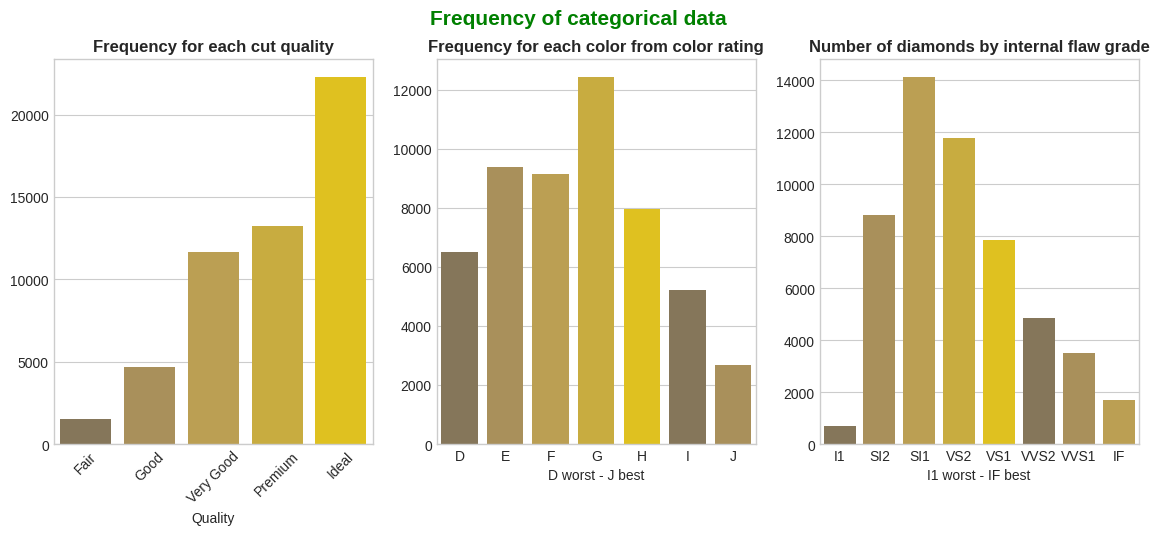

In [8]:
print('\033[42m            Insights                 \033[0m\n')
print('Price is heavily right skewed, so transformation is needed, \nlog transformation is a common way to transform right scewed distribution,\nlike prices, sizes, incomes.')
print('\nThe distribution of the carat is wavy with very high peaks,  0.3, 0.6, 1, 1.5, 2. \nMaybe popular format or this is the optimal way for a diamond manufacturer to process it.')


carat_dim_cor = df[['carat','x','y','z']].corr()
print('\n\033[32mThe weight and size strongly correlated with each other:\033[0m\n', carat_dim_cor)

print('\n\033[32mMost portion of diamonds are ideal, premium, very good cut, and G, E, F color.\033[0m\n')
print(df['cut'].value_counts(ascending=False))
print(df['color'].value_counts(ascending=False))

cut_freq = df['cut'].value_counts().reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

cut_palette = sns.color_palette("blend:#8C7853,#C49E4D,#D4AF37,#FFD700", n_colors=len(cut_freq))

fig = plt.figure(figsize=(14, 5))
plt.suptitle('Frequency of categorical data', fontweight='bold', fontsize=15, color='green')

plt.subplot(1,3,1)
sns.barplot(x=cut_freq.index, y=cut_freq.values, palette=cut_palette)
plt.title('Frequency for each cut quality', fontweight='bold')
plt.xlabel('Quality')
plt.xticks(rotation=45)

# -------------

plt.subplot(1,3,2)
col_freq = df['color'].value_counts().sort_index()
sns.barplot(x=col_freq.index, y=col_freq.values,palette=cut_palette)
plt.xlabel('D worst - J best')
plt.title('Frequency for each color from color rating', fontweight='bold')

# -------------

plt.subplot(1,3,3)
clar_freq = df['clarity'].value_counts().reindex(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
sns.barplot(x=clar_freq.index, y=clar_freq.values,palette=cut_palette)
plt.title('Number of diamonds by internal flaw grade', fontweight='bold')
plt.xlabel('I1 worst - IF best')
plt.show()

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_log
0,0.31,Ideal,F,VVS2,61.5,56.0,4.35,4.37,2.68,917.0,6.822197
1,1.02,Very Good,G,SI1,59.9,57.0,6.54,6.59,3.93,9246.0,9.132054
2,0.31,Ideal,H,SI1,62.4,55.0,4.36,4.33,2.71,698.0,6.549651
3,0.62,Ideal,G,VS1,60.7,55.0,5.55,5.59,3.38,2206.0,7.699389
4,0.41,Ideal,F,VS2,60.0,57.0,4.82,4.88,2.91,863.0,6.761573


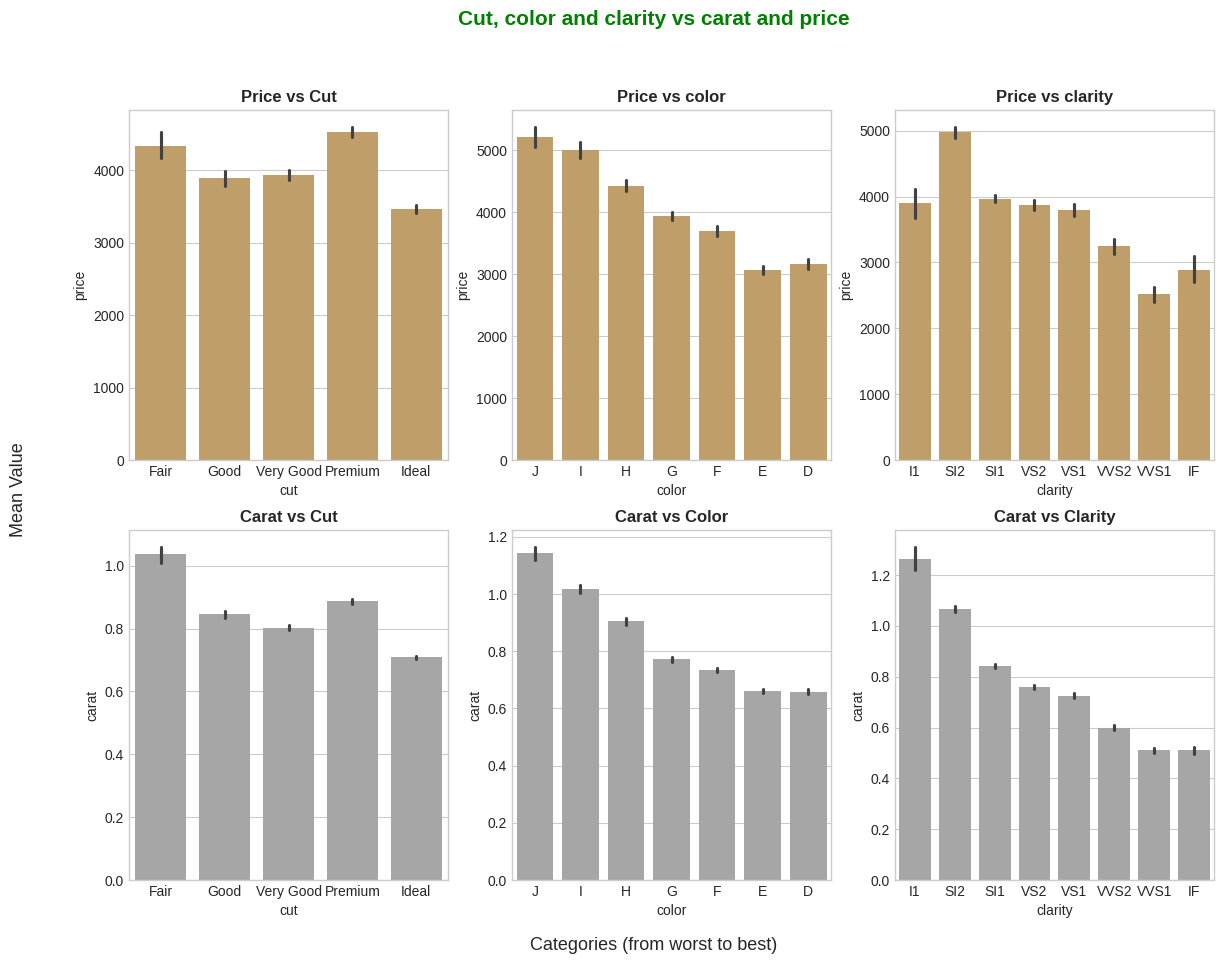

In [10]:
# orders ascending by quality
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
palette = sns.color_palette("copper_r", 7)

fig, axes = plt.subplots(2,3, figsize=(14,10))
plt.suptitle('Cut, color and clarity vs carat and price', fontweight = 'bold', fontsize=15, color = 'green')
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()


sns.barplot(ax = ax1, x=df['cut'], y = df['price'], estimator='mean', order=cut_order, color = '#cfa15a')
ax1.set_title('Price vs Cut', fontweight='bold')
sns.barplot(ax = ax4, x=df['cut'], y = df['carat'], estimator='mean', order=cut_order, color = '#a6a6a6')
ax4.set_title('Carat vs Cut', fontweight='bold')

sns.barplot(ax = ax2, x=df['color'], y = df['price'], estimator='mean', order=color_order, color = '#cfa15a')
ax2.set_title('Price vs color', fontweight='bold')
sns.barplot(ax = ax5, x=df['color'], y = df['carat'], estimator='mean', order=color_order, color = '#a6a6a6')
ax5.set_title('Carat vs Color', fontweight='bold')

sns.barplot(ax = ax3, x=df['clarity'], y = df['price'], estimator='mean', order = clarity_order, color = '#cfa15a')
ax3.set_title('Price vs clarity', fontweight='bold')
sns.barplot(ax = ax6, x=df['clarity'], y = df['carat'], estimator='mean', order = clarity_order, color = '#a6a6a6')
ax6.set_title('Carat vs Clarity', fontweight='bold')


fig.text(0.5, 0.04, 'Categories (from worst to best)', ha='center', fontsize=13)
fig.text(0.04, 0.5, 'Mean Value', va='center', rotation=90, fontsize=13)

plt.show()

            Price and Carat                 

The correlation of Price and Carat is quite significant,
and affect to other features roughly similar.

          carat     price
carat  1.000000  0.892287
price  0.892287  1.000000


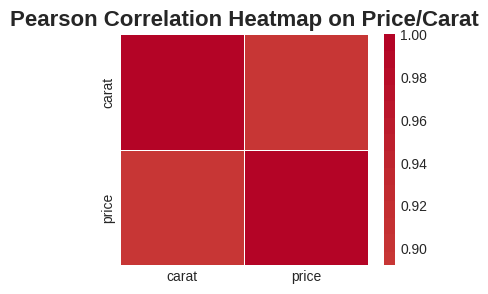


Pearson correlation matrix
                price   cut_enc  color_enc  clarity_enc
price        1.000000 -0.051408  -0.164721    -0.142254
cut_enc     -0.051408  1.000000   0.019178     0.178529
color_enc   -0.164721  0.019178   1.000000    -0.023676
clarity_enc -0.142254  0.178529  -0.023676     1.000000
                carat   cut_enc  color_enc  clarity_enc
carat        1.000000 -0.129577  -0.281346    -0.340793
cut_enc     -0.129577  1.000000   0.019178     0.178529
color_enc   -0.281346  0.019178   1.000000    -0.023676
clarity_enc -0.340793  0.178529  -0.023676     1.000000


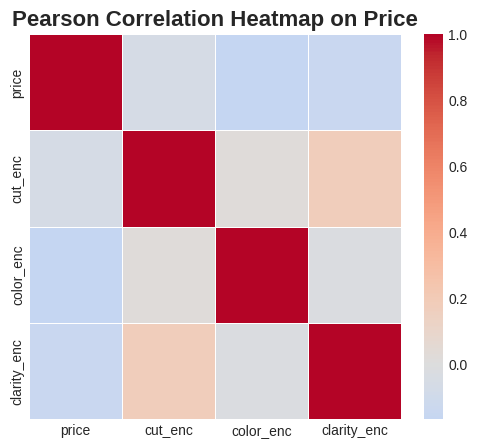

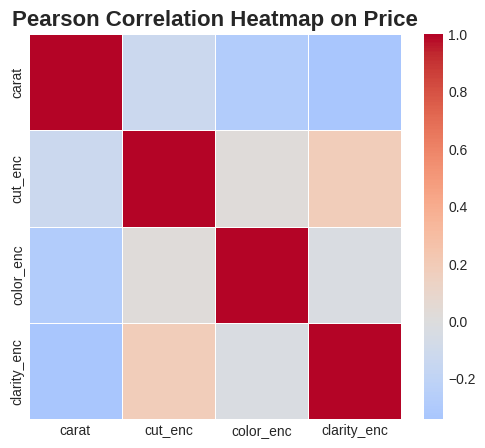

In [11]:
print('\033[42m            Price and Carat                 \033[0m\n')
print('The correlation of Price and Carat is quite significant,\nand affect to other features roughly similar.\n')
print(df[['carat', 'price']].corr())
plt.figure(figsize=(4,3))
sns.heatmap(df[['carat', 'price']].corr(), cmap='coolwarm', center=0, linewidth=0.5)
plt.title('Pearson Correlation Heatmap on Price/Carat', fontsize=16, fontweight='bold')
plt.show()
# cut: Fair < Good < Very Good < Premium < Ideal
# color: J < I < H < G < F < E < D
# clarity: I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF
df_enc = df.copy()
df_enc['cut_enc'] = df_enc['cut'].map({
    'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5
})
df_enc['color_enc'] = df_enc['color'].map({
    'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7
})
df_enc['clarity_enc'] = df_enc['clarity'].map({
    'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8
})
print('\n\033[32mPearson correlation matrix\033[0m')
print(df_enc[['price','cut_enc','color_enc','clarity_enc']].corr())
print(df_enc[['carat','cut_enc','color_enc','clarity_enc']].corr())

plt.figure(figsize=(6,5))
sns.heatmap(df_enc[['price','cut_enc','color_enc','clarity_enc']].corr(), cmap='coolwarm', center=0, linewidth=0.5)
plt.title('Pearson Correlation Heatmap on Price', fontsize=16, fontweight='bold')
plt.show()
plt.figure(figsize=(6,5))
sns.heatmap(df_enc[['carat','cut_enc','color_enc','clarity_enc']].corr(), cmap='coolwarm', center=0, linewidth=0.5)
plt.title('Pearson Correlation Heatmap on Price', fontsize=16, fontweight='bold')
plt.show()
# OHE
# print('\n\033[32mOHE correlation(comparing)\033[0m')
# df_one_encoded = df.copy()
# cat_cols = df_one_encoded.select_dtypes(exclude=['number']).columns
# df_one_encoded = pd.get_dummies(df_one_encoded, columns=cat_cols, drop_first=False)
# df_one_encoded = df_one_encoded.drop(columns=['depth', 'table', 'x', 'y', 'z', 'price_log'], axis=1)
# print(df_one_encoded[['price', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']].corr())
# print(df_one_encoded[['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']].corr())

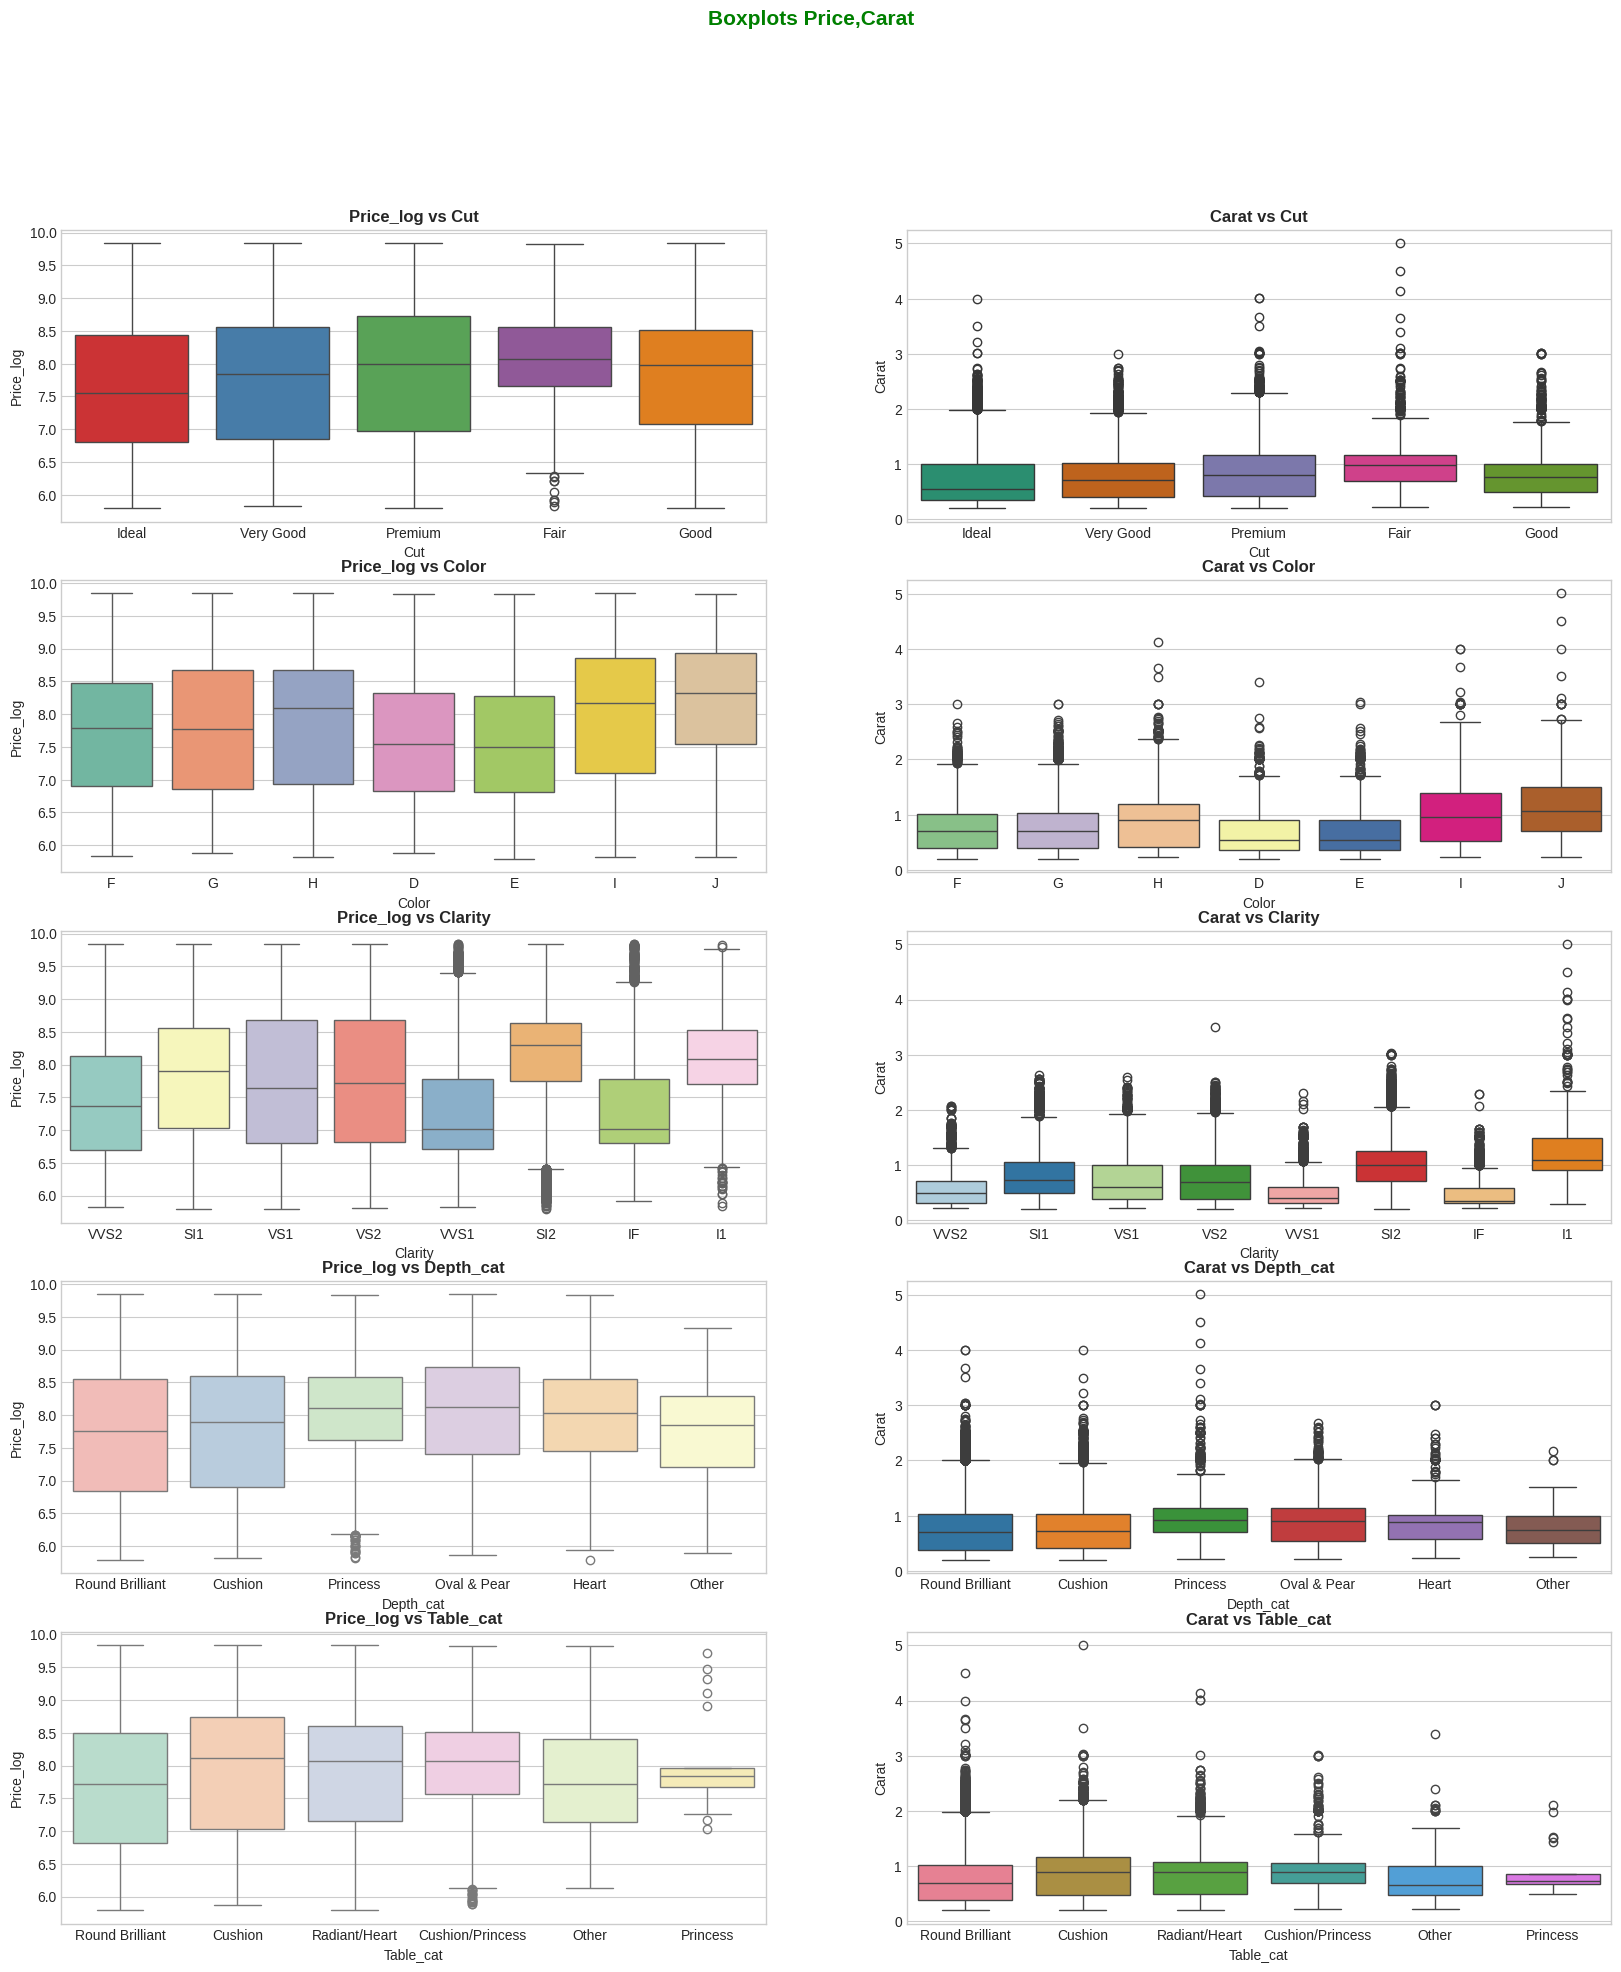

            Insights                 

Price without log transformation is not suitable for visualisation(outliers are far away).
Depth and table are categorized by the shape of the diamond template.


In conlusion for the price of the diamonds, the other features not so influential. There is still a correlation, but less than 10%


In [12]:
def categorize_table(t):
    if 53 <= t <= 58:
        return "Round Brilliant"
    elif 59 <= t <= 60:
        return "Cushion"
    elif 61 <= t <= 62:
        return "Radiant/Heart"
    elif 63 <= t <= 68:
        return "Cushion/Princess"
    elif 69 <= t <= 75:
        return "Princess"
    else:
        return "Other"
def categorize_depth(depth):
    if 59 <= depth <= 62.5:
        return "Round Brilliant"
    elif 64 <= depth <= 75:
        return "Princess"
    elif 61 <= depth <= 68:
        return "Cushion"
    elif 61 <= depth <= 68:
        return "Emerald & Asscher"
    elif 58 <= depth <= 63:
        return "Oval & Pear"
    elif 61 <= depth <= 69:
        return "Radiant"
    elif 56 <= depth <= 62:
        return "Heart"
    elif 58 <= depth <= 62:
        return "Marquise"
    else:
        return "Other"
df['depth_cat'] = df['depth'].apply(categorize_depth)
df['table_cat'] = df['table'].apply(categorize_table)


# Nurbol, temporary, change style if you want 
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

t = ['cut', 'color','clarity','depth_cat','table_cat']
params = ['price_log','carat']
fig, axes = plt.subplots(len(t), len(params), figsize=(20, 22))
plt.suptitle('Boxplots Price,Carat', fontweight='bold', fontsize=15, color='green')
palette = [['Set1',  'Dark2'],['Set2',  'Accent'],['Set3',  'Paired'],['Pastel1','tab10'],['Pastel2','husl']]


for i, feat in enumerate(t):
    for j, target in enumerate(params):
        ax = axes[i,j]
        sns.boxplot(data=df, y=target, x=feat, palette=palette[i][j], ax=ax, hue=feat)
        ax.set_title(f'{target.capitalize()} vs {feat.capitalize()}', fontweight='semibold')
        ax.set_xlabel(feat.capitalize())
        ax.set_ylabel(target.capitalize())

plt.show()

print('\033[42m            Insights                 \033[0m\n')
print('Price without log transformation is not suitable for visualisation(outliers are far away).\nDepth and table are categorized by the shape of the diamond template.\n')
print('\nIn conlusion for the price of the diamonds, the other features not so influential. There is still a correlation, but less than 10%')

In [13]:
# feature extractions, categorization
df_fe=df.copy()
df_fe['box_volume'] = df_fe['x']*df['y']*df_fe['z']
df_fe['box_density'] = df_fe['carat'] / df_fe['box_volume']
df_fe['length_width_ratio']=df_fe['x'] / df_fe['y']

df_fe['log_carat'] = np.log1p(df_fe['carat'])
df_fe['log_volume'] = np.log1p(df_fe['box_volume'])

df_fe['size_category'] = pd.cut(df_fe['carat'], 
                                bins=[0, 0.5,1,1.5,2,3,10], 
                                labels=['Tiny','Small','Medium','Large','Very Large','Huge'])

- Reminder. Since the volume was measured by formula of the volume of the parallelepiped, as a box.
  The box volume feature not represents the true measure but it can show in general, the size of it.
- With price, also the weight(carat) and volume also are log1 transformed, they can be useful for modeling

In [14]:
df_fe.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_log,depth_cat,table_cat,box_volume,box_density,length_width_ratio,log_carat,log_volume,size_category
0,0.31,Ideal,F,VVS2,61.5,56.0,4.35,4.37,2.68,917.0,6.822197,Round Brilliant,Round Brilliant,50.945460,0.006085,0.995423,0.270027,3.950194,Tiny
1,1.02,Very Good,G,SI1,59.9,57.0,6.54,6.59,3.93,9246.0,9.132054,Round Brilliant,Round Brilliant,169.377498,0.006022,0.992413,0.703098,5.138017,Medium
2,0.31,Ideal,H,SI1,62.4,55.0,4.36,4.33,2.71,698.0,6.549651,Round Brilliant,Round Brilliant,51.161548,0.006059,1.006928,0.270027,3.954346,Tiny
3,0.62,Ideal,G,VS1,60.7,55.0,5.55,5.59,3.38,2206.0,7.699389,Round Brilliant,Round Brilliant,104.862810,0.005912,0.992844,0.482426,4.662144,Small
4,0.41,Ideal,F,VS2,60.0,57.0,4.82,4.88,2.91,863.0,6.761573,Round Brilliant,Round Brilliant,68.447856,0.005990,0.987705,0.343590,4.240576,Tiny


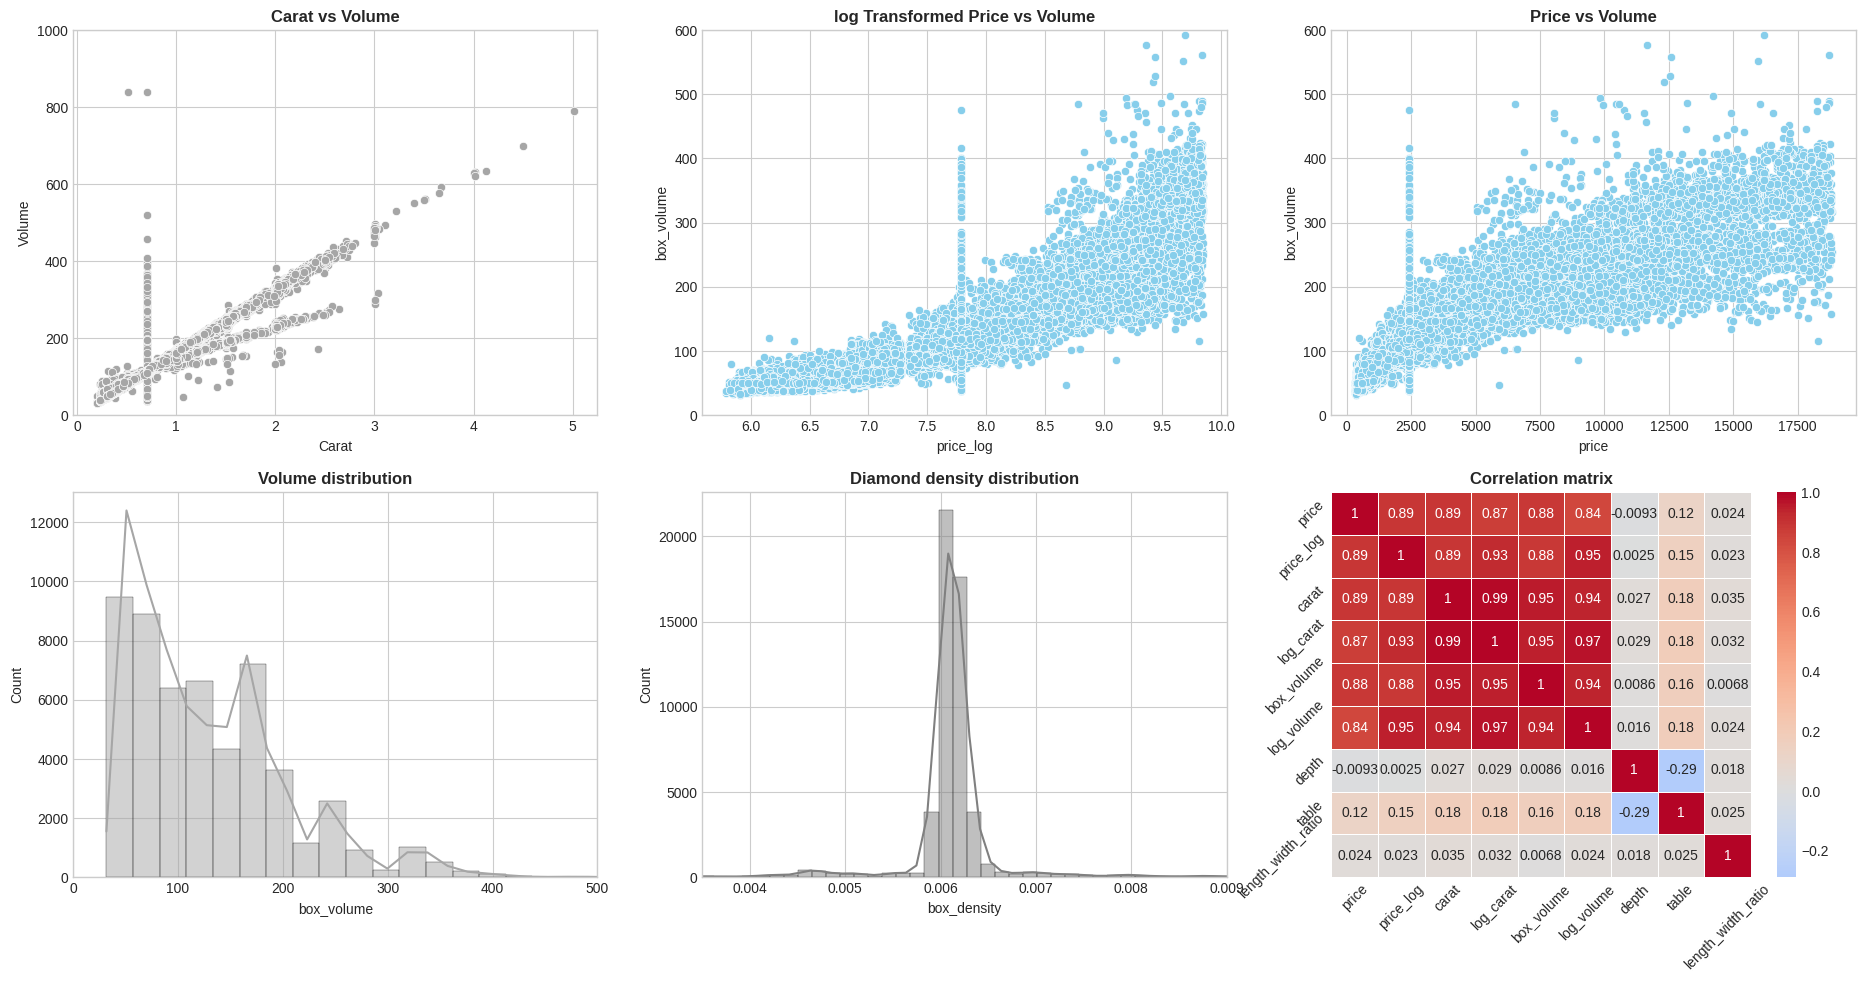


            Insights                 

- Volume and the weight (carat) correlation is almost linear, as expected.
- Linear relationship of Volume and Price is not very obvious, but it's present; it looks more like a rotated bell shape.
- Size distribution has peaks — likely due to customer preferences or production specifics.
- Densities of diamonds are similar because density is based on the parallelepiped approximation.
- Shape variations of diamonds create bias in density distribution around 5–10%.



In [15]:
# Nurbol, temporary, change style if you want 
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
fig = plt.figure(figsize=(23, 23))

plt.subplot(4,3,1)
sns.scatterplot(data=df_fe, x='carat',y='box_volume',color='#a6a6a6')
plt.title('Carat vs Volume', fontweight='semibold')
plt.ylabel('Volume')
plt.xlabel('Carat')
plt.ylim(0,1000)

plt.subplot(4,3,2)
sns.scatterplot(data=df_fe,x='price_log', y='box_volume', color='skyblue')
plt.title('log Transformed Price vs Volume', fontweight='semibold')
plt.ylim(0,600)

plt.subplot(4,3,3)
sns.scatterplot(data=df_fe,x='price', y='box_volume', color='skyblue')
plt.title('Price vs Volume', fontweight='semibold')
plt.ylim(0,600)

plt.subplot(4,3,4)
sns.histplot(df_fe['box_volume'], kde=True, bins=150, color='#a6a6a6')
plt.title('Volume distribution', fontweight='semibold')
plt.xlim(0,500)

plt.subplot(4,3,5)
sns.histplot(df_fe['box_density'], kde=True, bins=150, color='grey')
plt.title('Diamond density distribution', fontweight='semibold')
plt.xlim(0.0035,0.009)

corr_cols=df_fe[['price', 'price_log', 'carat', 'log_carat', 'box_volume', 'log_volume', 'depth', 'table', 'length_width_ratio']].corr()
plt.subplot(4,3,6)
sns.heatmap(corr_cols, cmap='coolwarm', center=0, linewidth=0.5, annot=True)
plt.title('Correlation matrix', fontweight='semibold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)


plt.show()


print("""
\033[42m            Insights                 \033[0m

- Volume and the weight (carat) correlation is almost linear, as expected.
- Linear relationship of Volume and Price is not very obvious, but it's present; it looks more like a rotated bell shape.
- Size distribution has peaks — likely due to customer preferences or production specifics.
- Densities of diamonds are similar because density is based on the parallelepiped approximation.
- Shape variations of diamonds create bias in density distribution around 5–10%.
""")

### Task 5
- Применение ML‑моделей (25 баллов) Обоснование выбора моделей, Корректная подготовка данных для моделей,
- Реализация 1–3 моделей, оценка качества моделей, Интерпретация результатов моделей 

- In this analyis ml models that applied: Linear Regression, Decision Trees variation, Support Vector Machines

In [16]:
df_enc_small = df_enc[['cut_enc', 'color_enc', 'clarity_enc']]
df_enc_small = df_enc_small.reset_index(drop=True)
df_fe = df_fe.reset_index(drop=True)
df_mod = pd.concat([df_fe, df_enc_small], axis=1)

df_mod.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,...,table_cat,box_volume,box_density,length_width_ratio,log_carat,log_volume,size_category,cut_enc,color_enc,clarity_enc
0,0.31,Ideal,F,VVS2,61.5,56.0,4.35,4.37,2.68,917.0,...,Round Brilliant,50.945460,0.006085,0.995423,0.270027,3.950194,Tiny,5,5,6
1,1.02,Very Good,G,SI1,59.9,57.0,6.54,6.59,3.93,9246.0,...,Round Brilliant,169.377498,0.006022,0.992413,0.703098,5.138017,Medium,3,4,3
2,0.31,Ideal,H,SI1,62.4,55.0,4.36,4.33,2.71,698.0,...,Round Brilliant,51.161548,0.006059,1.006928,0.270027,3.954346,Tiny,5,3,3
3,0.62,Ideal,G,VS1,60.7,55.0,5.55,5.59,3.38,2206.0,...,Round Brilliant,104.862810,0.005912,0.992844,0.482426,4.662144,Small,5,4,5
4,0.41,Ideal,F,VS2,60.0,57.0,4.82,4.88,2.91,863.0,...,Round Brilliant,68.447856,0.005990,0.987705,0.343590,4.240576,Tiny,5,5,4


In [17]:
X = df_mod[['carat', 'depth', 'table', 'length_width_ratio','log_carat', 'log_volume', 'cut_enc', 'color_enc', 'clarity_enc']]
y = df_mod['price']
y_log = df_mod['price_log']

xtr, xte, ytr, yte = train_test_split(X,y,random_state=42, train_size=0.8)
sca = StandardScaler()
xtr_sc = sca.fit_transform(xtr)
xte_sc = sca.transform(xte)

param_lr={}
param_ridge = {
    'alpha': [0.01, 0.1, 1, 5, 10, 20]
}
param_lasso = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}
param_en = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.9]
}
param_rf = {
    'n_estimators': [200, 350, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
param_gb = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
param_svr = {
    'C': [1, 5, 10, 50],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
models_params = {
    'LinearRegression': (LinearRegression(), param_lr),
    'Ridge': (Ridge(), param_ridge),
    'Lasso': (Lasso(), param_lasso),
    'ElasticNet': (ElasticNet(), param_en),
    'RandomForest': (RandomForestRegressor(random_state=42), param_rf),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_gb),
    'SVR': (SVR(), param_svr)
}
results = []

for name, (model, params) in models_params.items():
    print(f"{name}")

    gs = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='r2',
        cv=3,
        n_jobs=-1
    )
    if name in ["LinearRegression", "Ridge", "Lasso", "ElasticNet","SVR"]:
        gs.fit(xtr_sc, ytr)
        ypred=gs.predict(xte_sc)   
        test_r2 = gs.score(xte_sc, yte)
    else:
        gs.fit(xtr, ytr)
        ypred=gs.predict(xte)
        test_r2 = gs.score(xte, yte)
        
    test_mae = mean_absolute_error(yte, ypred)
    test_mse = mean_squared_error(yte, ypred)    
    results.append({
        'Model': name,
        'Best_params': gs.best_params_,
        'CV_R2_mean': gs.best_score_,
        'Test_R2': test_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse
    })

results_df = pd.DataFrame(results)
results_df

LinearRegression
Ridge
Lasso


/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.743e+10, tolerance: 4.412e+07
  model = cd_fast.enet_coordinate_descent(
/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+10, tolerance: 4.391e+07
  model = cd_fast.enet_coordinate_descent(
/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

ElasticNet


/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+10, tolerance: 4.403e+07
  model = cd_fast.enet_coordinate_descent(
/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e+10, tolerance: 4.403e+07
  model = cd_fast.enet_coordinate_descent(
/home/lb/jupyterlab-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

RandomForest


/home/lb/jupyterlab-env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GradientBoosting
SVR


,Model,Best_params,CV_R2_mean,Test_R2,Test_MAE,Test_MSE
0,LinearRegression,{},0.853508,0.859592,937.379537,2.212431e+06
1,Ridge,{'alpha': 5},0.853526,0.859403,938.564435,2.215406e+06
2,Lasso,{'alpha': 0.1},0.853510,0.859562,937.488887,2.212901e+06
3,ElasticNet,"{'alpha': 0.001, 'l1_ratio': 0.9}",0.853525,0.859431,938.389091,2.214965e+06
4,RandomForest,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.939193,0.943023,412.927069,8.977958e+05
5,GradientBoosting,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.942369,0.946624,394.288518,8.410609e+05
6,SVR,"{'C': 50, 'epsilon': 0.2, 'gamma': 0.1, 'kerne...",0.876151,0.891977,558.516884,1.702142e+06


/tmp/ipykernel_9176/78196434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model',y='CV_R2_mean', palette='Set1')


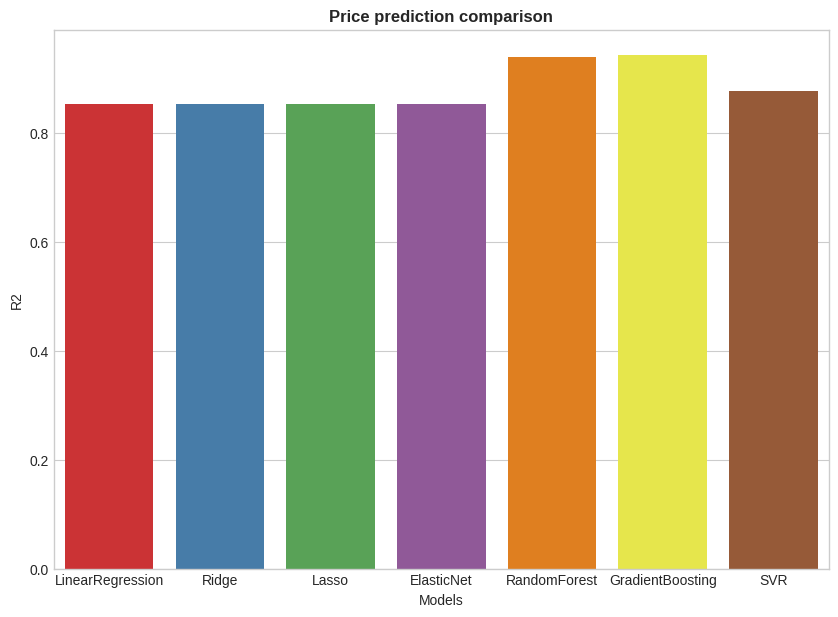

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(data=results_df, x='Model',y='CV_R2_mean', palette='Set1')
plt.title('Price prediction comparison',fontweight='semibold')
plt.xlabel('Models')
plt.ylabel('R2')
plt.show()

In [39]:
results_df.loc[results_df['Model']=='GradientBoosting', 'Best_params'].values[0]

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

Gradient Boost RESULTS
r2:  0.94656
mae: 394.49
mse: 842062.78


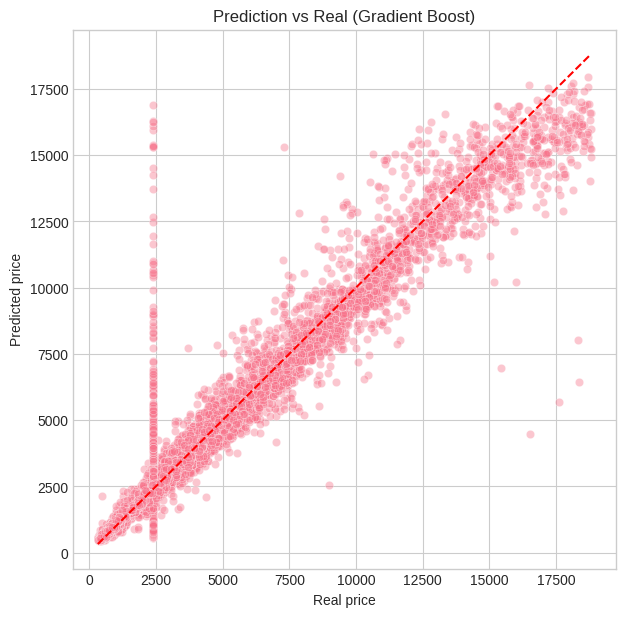

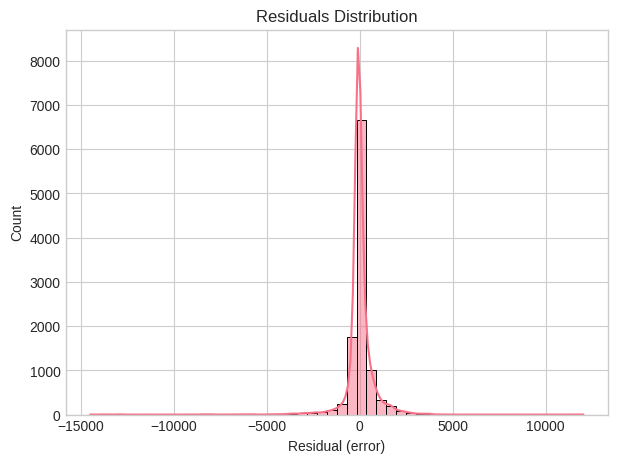

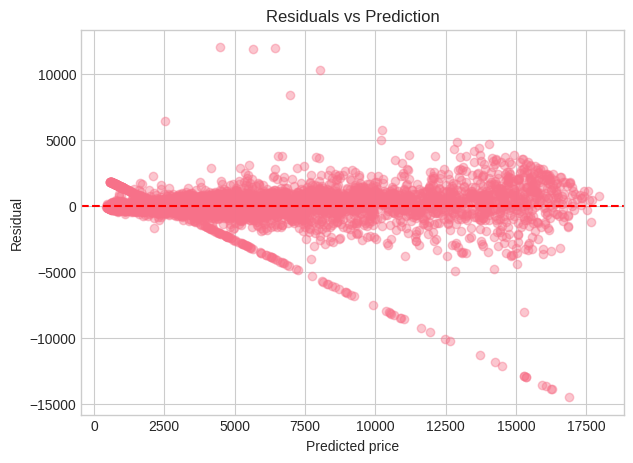

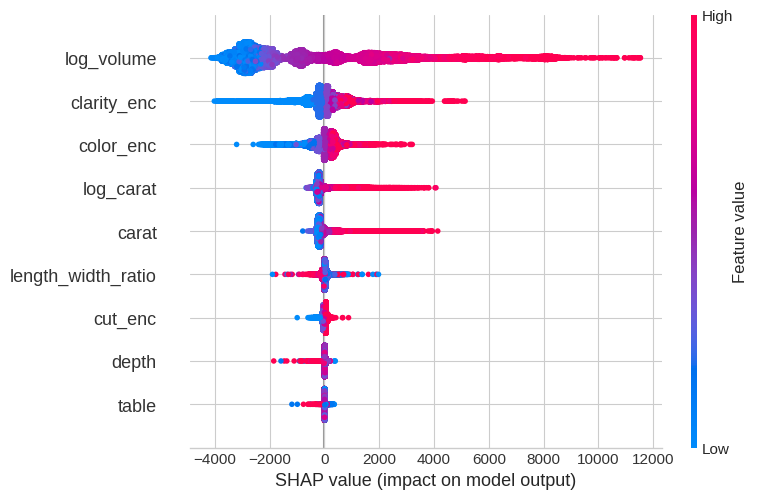

In [43]:
model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=7,
    n_estimators=500,
    random_state=42
)

model.fit(xtr_sc, ytr)
pred = model.predict(xte_sc)

r2 = r2_score(yte, pred)
mae = mean_absolute_error(yte, pred)
mse = mean_squared_error(yte, pred)

print("\033[1;43mGradient Boost RESULTS\033[0m")
print(f"r2:  {r2:.5f}")
print(f"mae: {mae:.2f}")
print(f"mse: {mse:.2f}")




plt.figure(figsize=(7, 7))
sns.scatterplot(x=yte, y=pred, alpha=0.4)
plt.plot([yte.min(), yte.max()], [yte.min(), yte.max()], 'r--')
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.title("Prediction vs Real (Gradient Boost)")
plt.show()

residuals = yte - pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residual (error)")
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted price")
plt.ylabel("Residual")
plt.title("Residuals vs Prediction")
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtr_sc)


shap.summary_plot(shap_values, xtr_sc, feature_names=X.columns)

## Task 6
Итоговые выводы и интерпретация (10 баллов) Подведение итогов EDA и ML части

#### Overall conclusion of analysis
- The most valuable predictors are the size and weight of the diamond. The dependence of the other features(proportion, quality) have very little impact on price.
- Cause of the big price of the most quality diamonds is their size(carat).
- The quality(color, clarity) is the most valuable when the the size of the diamond is small.
- The proportion(depth, table) of diamond is important when they hit the specific range, table 53-58%, depth 59-62.3%. The proportion affects how the light reflects.
- The best models are: Gradient Boosting, Random Forests; All "linear" methods perform in comparison worse and almost identical on resluts; Support vector machines for regression perform better than "linear methods'.
